# Actividad: Problemas de clasificación
**Joel Isaias Solano Ocampo | A01639289**



---


## Ejercicio 1:
En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función loadtxt de numpyLinks to an external site. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.

0. Importamos librerias:

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from sklearn.svm import SVC
from sklearn import datasets
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [2]:
drive.mount('/content/drive/')
df = np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/content/P1_5.txt')
df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


array([[ 1.        ,  0.        ,  6.77864488, ...,  0.74260514,
         0.34744616,  0.13121125],
       [ 1.        ,  1.        , -0.35472517, ...,  2.01310089,
         1.28743036,  0.52126382],
       [ 1.        ,  1.        ,  1.7277155 , ...,  0.28858532,
         0.67945384,  0.82215485],
       ...,
       [ 2.        ,  0.        ,  2.07424806, ...,  1.18131646,
         1.38569938,  0.99976084],
       [ 2.        ,  1.        , -0.05645914, ...,  0.74215356,
         0.1240741 , -0.09048593],
       [ 2.        ,  1.        , -0.04833282, ...,  1.04595614,
         0.73797014,  0.83197572]])

In [3]:
X = df[:,1:]
Y = df[:,0]

1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [4]:
##### Accuracy with imbalanced sample #####
print("----- Imbalanced sample -----")
kf = StratifiedKFold(n_splits = 5, shuffle = True)
clf = SVC(kernel = 'linear')
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  # Training phase
  x_train = X[train_index, :]
  y_train = Y[train_index]
  clf.fit(x_train, y_train)
  # Test phase
  x_test = X[test_index, :]
  y_test = Y[test_index]
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Imbalanced sample -----
              precision    recall  f1-score   support

         1.0       0.73      0.63      0.68       281
         2.0       0.94      0.96      0.95      1689

    accuracy                           0.91      1970
   macro avg       0.84      0.79      0.81      1970
weighted avg       0.91      0.91      0.91      1970



In [5]:
##### Accuracy with balanced sample (Subsamplig) #####
print("----- Subsamplig -----")
clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  # Training phase
  x_train = X[train_index, :]
  y_train = Y[train_index]
  x1 = x_train[y_train==1, :]
  y1 = y_train[y_train==1]
  n1 = len(y1)
  x2 = x_train[y_train==2, :]
  y2 = y_train[y_train==2]
  n2 = len(y2)
  ind = random.sample([i for i in range(n2)], n1)
  x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
  y_sub = np.concatenate((y1, y2[ind]), axis=0)
  clf.fit(x_sub, y_sub)
  # Test phase
  x_test = X[test_index, :]
  y_test = Y[test_index]
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.47      0.83      0.60       281
         2.0       0.97      0.85      0.90      1689

    accuracy                           0.84      1970
   macro avg       0.72      0.84      0.75      1970
weighted avg       0.90      0.84      0.86      1970



In [6]:
##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")
clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  # Training phase
  x_train = X[train_index, :]
  y_train = Y[train_index]
  x1 = x_train[y_train==1, :]
  y1 = y_train[y_train==1]
  n1 = len(y1)
  x2 = x_train[y_train==2, :]
  y2 = y_train[y_train==2]
  n2 = len(y2)
  ind = random.choices([i for i in range(n1)], k = n2)
  x_sub = np.concatenate((x1[ind,:], x2), axis=0)
  y_sub = np.concatenate((y1[ind], y2), axis=0)
  clf.fit(x_sub, y_sub)
  # Test phase
  x_test = X[test_index, :]
  y_test = Y[test_index]
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.53      0.80      0.64       281
         2.0       0.96      0.88      0.92      1689

    accuracy                           0.87      1970
   macro avg       0.75      0.84      0.78      1970
weighted avg       0.90      0.87      0.88      1970



In [7]:
##### Accuracy with balanced sample (weighted loss function) #####
print("----- Weighted loss function -----")
clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  # Training phase
  x_train = X[train_index, :]
  y_train = Y[train_index]
  clf.fit(x_train, y_train)
  # Test phase
  x_test = X[test_index, :]
  y_test = Y[test_index]
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Weighted loss function -----
              precision    recall  f1-score   support

         1.0       0.54      0.82      0.66       281
         2.0       0.97      0.89      0.92      1689

    accuracy                           0.88      1970
   macro avg       0.76      0.85      0.79      1970
weighted avg       0.91      0.88      0.89      1970



2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [8]:
# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  x_train = X[train_index, :]
  y_train = Y[train_index]
  x_test = X[test_index, :]
  y_test = Y[test_index]
  clf = SVC(kernel = 'linear')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.73      0.59      0.65       281
         2.0       0.93      0.96      0.95      1689

    accuracy                           0.91      1970
   macro avg       0.83      0.78      0.80      1970
weighted avg       0.91      0.91      0.91      1970



In [9]:
# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  x_train = X[train_index, :]
  y_train = Y[train_index]
  x_test = X[test_index, :]
  y_test = Y[test_index]
  clf = SVC(kernel = 'rbf')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.89      0.57      0.69       281
         2.0       0.93      0.99      0.96      1689

    accuracy                           0.93      1970
   macro avg       0.91      0.78      0.83      1970
weighted avg       0.93      0.93      0.92      1970



In [10]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  x_train = X[train_index, :]
  y_train = Y[train_index]
  x_test = X[test_index, :]
  y_test = Y[test_index]
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.68      0.35      0.46       281
         2.0       0.90      0.97      0.93      1689

    accuracy                           0.88      1970
   macro avg       0.79      0.66      0.70      1970
weighted avg       0.87      0.88      0.87      1970



In [11]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  x_train = X[train_index, :]
  y_train = Y[train_index]
  x_test = X[test_index, :]
  y_test = Y[test_index]
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.48      0.49      0.48       281
         2.0       0.91      0.91      0.91      1689

    accuracy                           0.85      1970
   macro avg       0.70      0.70      0.70      1970
weighted avg       0.85      0.85      0.85      1970



In [12]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
  x_train = X[train_index, :]
  y_train = Y[train_index]
  x_test = X[test_index, :]
  y_test = Y[test_index]
  clf = LinearDiscriminantAnalysis()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.76      0.61      0.68       281
         2.0       0.94      0.97      0.95      1689

    accuracy                           0.92      1970
   macro avg       0.85      0.79      0.81      1970
weighted avg       0.91      0.92      0.91      1970



3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [13]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normaliza las características utilizando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Se crea la clase de regresión logistica desde 0
class LogisticRegressionS:
    def __init__(self, alpha=0.0005, max_iterations=100000):
        self.alpha = alpha
        self.max_iterations = max_iterations

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        self.beta = self.fit_model(X, Y, self.alpha, self.max_iterations)

    def fit_model(self, X, Y, alpha=0.0005, max_iterations=100000):
        npredictors = X.shape[1]
        beta = 2 * np.random.rand(npredictors) - 1.0
        it = 0

        while (np.linalg.norm(self.gradient(X, Y, beta)) > 1e-4) and (it < max_iterations):
            beta = beta - alpha * self.gradient(X, Y, beta)
            it = it + 1

        return beta

    def gradient(self, X, Y, beta):
        xbeta = X @ beta
        c0 = (Y == 0)
        c1 = (Y == 1)

        exp0 = np.exp(xbeta[c0])
        l0 = (exp0 / (1 + exp0)) * X[c0, :].transpose()

        exp1 = np.exp(xbeta[c1])
        l1 = (exp1 / (1 + exp1)) * X[c1, :].transpose()

        return l0.sum(axis=1) - l1.sum(axis=1)

    def predict(self, X):
        xbeta = X @ self.beta
        tmp = 1. / (1. + np.exp(-xbeta))
        return (tmp > 0.5).astype("int32")

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

In [15]:
# Hacemos el modelo con nuestra clase
model = LogisticRegressionS(alpha=0.0005, max_iterations=100)
model.fit(X, Y)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar la precisión
accuracy = model.accuracy(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Imprime un informe de clasificación detallado
print(classification_report(y_test, y_pred, zero_division=1))

Precisión del modelo: 13.71%
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         0
         1.0       0.29      0.95      0.44        57
         2.0       1.00      0.00      0.00       337

    accuracy                           0.14       394
   macro avg       0.43      0.65      0.15       394
weighted avg       0.90      0.14      0.06       394



<ipython-input-14-481eb4434369>:33: RuntimeWarning: overflow encountered in exp
  exp1 = np.exp(xbeta[c1])
<ipython-input-14-481eb4434369>:34: RuntimeWarning: invalid value encountered in divide
  l1 = (exp1 / (1 + exp1)) * X[c1, :].transpose()


4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

In [16]:
################################################################################
# Reduce number of features to the half
################################################################################
print("----- Feature selection using 50% of predictors -----")
# Select features
fselection = SelectKBest(f_classif, k = 6)
fselection.fit(X, Y)
print("Selected features: ", fselection.get_feature_names_out())
# Fit model using the new data set
clf = SVC(kernel = 'linear')
x_transformed = fselection.transform(X)
clf.fit(x_transformed, Y)
# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(X, Y):
  # Training phase
  x_train = X[train_index, :]
  y_train = Y[train_index]
  clf_cv = SVC(kernel = 'linear')
  fselection_cv = SelectKBest(f_classif, k = 6)
  fselection_cv.fit(x_train, y_train)
  x_train = fselection_cv.transform(x_train)
  clf_cv.fit(x_train, y_train)
  # Test phase
  x_test = fselection_cv.transform(X[test_index, :])
  y_test = Y[test_index]
  y_pred = clf_cv.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
  print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Feature selection using 50% of predictors -----
Selected features:  ['x10' 'x11' 'x78' 'x79' 'x89' 'x90']
              precision    recall  f1-score   support

         1.0       1.00      0.18      0.30        57
         2.0       0.88      1.00      0.93       337

    accuracy                           0.88       394
   macro avg       0.94      0.59      0.62       394
weighted avg       0.90      0.88      0.84       394

              precision    recall  f1-score   support

         1.0       0.78      0.25      0.38       113
         2.0       0.89      0.99      0.93       675

    accuracy                           0.88       788
   macro avg       0.83      0.62      0.66       788
weighted avg       0.87      0.88      0.85       788

              precision    recall  f1-score   support

         1.0       0.80      0.24      0.37       169
         2.0       0.89      0.99      0.94      1013

    accuracy                           0.88      1182
   macro avg    

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8573604060913705
---- n features = 2
ACC: 0.8573604060913705
---- n features = 3
ACC: 0.8583756345177666
---- n features = 4
ACC: 0.8670050761421318
---- n features = 5
ACC: 0.8664974619289341
---- n features = 6
ACC: 0.8741116751269036
---- n features = 7
ACC: 0.8781725888324873
---- n features = 8
ACC: 0.8802030456852792
---- n features = 9
ACC: 0.8817258883248732
---- n features = 10
ACC: 0.8817258883248732
---- n features = 11
ACC: 0.8857868020304569
---- n features = 12
ACC: 0.8868020304568528
---- n features = 13
ACC: 0.8903553299492385
Optimal number of features:  13


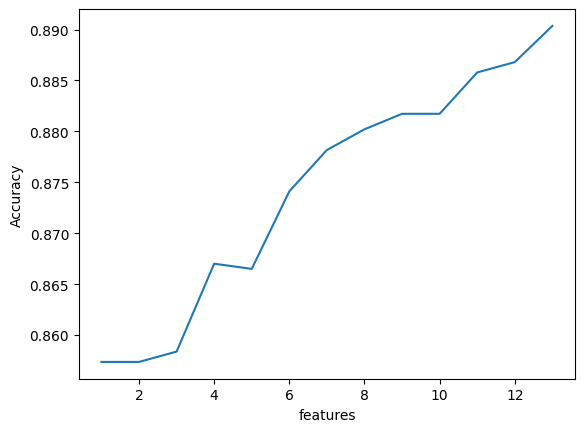

In [17]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
acc_nfeat = []
for n_feat in n_feats:
  print('---- n features =', n_feat)
  acc_cv = []
  kf = StratifiedKFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(X, Y):
    # Training phase
    x_train = X[train_index, :]
    y_train = Y[train_index]
    clf_cv = SVC(kernel = 'linear')
    fselection_cv = SelectKBest(f_classif, k = n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)
    # Test phase
    x_test = fselection_cv.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = clf_cv.predict(x_test)
    acc_i = accuracy_score(y_test, y_pred)
    acc_cv.append(acc_i)
  acc = np.average(acc_cv)
  acc_nfeat.append(acc)
  print('ACC:', acc)
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()

In [18]:
# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(X, Y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(X)
clf.fit(x_transformed, Y)

Selected features:  ['x9' 'x10' 'x11' 'x12' 'x76' 'x77' 'x78' 'x79' 'x80' 'x88' 'x89' 'x90'
 'x91']


SVC(kernel='linear')

5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.

In [19]:
# Reducimos el número de características a la mitad
print("----- Selección de características usando el 50% de los predictores -----")
# Seleccionamos las características
clf = LogisticRegression(max_iter=10000)
fselection = SequentialFeatureSelector(clf, n_features_to_select = 0.5)
fselection.fit(X, Y)
print("Selected features: ", fselection.get_feature_names_out())
# Ajustamos el modelo utilizando el nuevo conjunto de datos
x_transformed = fselection.transform(X)
clf.fit(x_transformed, Y)
# Evaluamos el modelo utilizando validación cruzada
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(X, Y):
    # Fase de entrenamiento
    x_train = X[train_index, :]
    y_train = Y[train_index]
    clf_cv = LogisticRegression(max_iter=10000)
    fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=0.5)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)
    # Fase de prueba
    x_test = fselection_cv.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Selección de características usando el 50% de los predictores -----
Selected features:  ['x0' 'x2' 'x3' 'x4' 'x10' 'x11' 'x14' 'x22' 'x24' 'x28' 'x29' 'x33' 'x34'
 'x35' 'x36' 'x37' 'x38' 'x39' 'x40' 'x41' 'x42' 'x43' 'x44' 'x45' 'x46'
 'x50' 'x55' 'x56' 'x57' 'x60' 'x64' 'x70' 'x71' 'x72' 'x73' 'x74' 'x80'
 'x83' 'x84' 'x85' 'x86' 'x87' 'x88' 'x89' 'x90' 'x91' 'x92' 'x93' 'x94'
 'x95' 'x96' 'x97' 'x98' 'x99' 'x100' 'x101' 'x102' 'x111' 'x113' 'x117'
 'x118' 'x119' 'x120' 'x121' 'x122' 'x123' 'x124' 'x125' 'x126' 'x128'
 'x131' 'x135' 'x140' 'x143' 'x144' 'x148' 'x153']


KeyboardInterrupt: ignored

In [ ]:
# Encontrar el número óptimo de características utilizando validación cruzada
print("----- Selección óptima del número de características -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
acc_nfeat = []
for n_feat in n_feats:
    print('---- n características =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(X, Y):
        # Fase de entrenamiento
        x_train = X[train_index, :]
        y_train = Y[train_index]
        clf_cv = LogisticRegression()
        fselection_cv = SequentialFeatureSelector(clf_cv,n_features_to_select = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Fase de prueba
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("Características")
plt.ylabel("Accuracy")
plt.show()

6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.

In [ ]:
################################################################################
# Reduce number of features to the half
################################################################################
print("----- Feature selection using 50% of predictors -----")
# Select features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = 0.5)
fselection.fit(X, Y)
print("Selected features: ", fselection.get_feature_names_out())
# Fit model using the new data set
x_transformed = fselection.transform(X)
clf.fit(x_transformed, Y)
# Evaluate model using cross validation
cv_y_test = []
cv_y_pred = []
kf = StratifiedKFold(n_splits=5, shuffle = True)
for train_index, test_index in kf.split(X, Y):
  # Training phase
  x_train = X[train_index, :]
  y_train = Y[train_index]
  clf_cv = SVC(kernel = 'linear')
  fselection_cv = RFE(clf_cv, n_features_to_select=0.5)
  fselection_cv.fit(x_train, y_train)
  x_train = fselection_cv.transform(x_train)
  clf_cv.fit(x_train, y_train)
  # Test phase
  x_test = fselection_cv.transform(x[test_index, :])
  y_test = Y[test_index]
  y_pred = clf_cv.predict(x_test)
  cv_y_test.append(y_test)
  cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

In [ ]:
################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of number of features -----")
n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
acc_nfeat = []
for n_feat in n_feats:
  print('---- n features =', n_feat)
  acc_cv = []
  kf = StratifiedKFold(n_splits=5, shuffle = True)
  for train_index, test_index in kf.split(X, Y):
    # Training phase
    x_train = X[train_index, :]
    y_train = Y[train_index]
    clf_cv = SVC(kernel = 'linear')
    fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)
    clf_cv.fit(x_train, y_train)
    # Test phase
    x_test = fselection_cv.transform(X[test_index, :])
    y_test = Y[test_index]
    y_pred = clf_cv.predict(x_test)
    acc_i = accuracy_score(y_test, y_pred)
    acc_cv.append(acc_i)
  acc = np.average(acc_cv)
  acc_nfeat.append(acc)
  print('ACC:', acc)
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")

In [ ]:
plt.ylabel("Accuracy")
plt.show()
# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(X, Y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(X)
clf.fit(x_transformed, Y)

7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
* Aplica el método de selección de características con todos los datos.
* Ajusta el modelo con las características encontradas.

8. Contesta las siguientes preguntas:
* **¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**
* **De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**
* **¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**
* **¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**
* **Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**



---

## Ejercicio 2:
En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función loadtxt de numpyLinks to an external site.. A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from sklearn.svm import SVC
from sklearn import datasets
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector, RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, make_scorer, f1_score

In [ ]:
drive.mount('/content/drive/')
df = pd.DataFrame(np.loadtxt('/content/drive/MyDrive/Colab_Notebooks/content/M_5.txt'))
df.head()

1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [ ]:
X = df.drop(0, axis=1).values
Y = df[0].values
# features = X.columns.tolist()
# n_features = len(features)
# X = X.values

In [ ]:
##### Precisión con muestra desbalanceada #####
print("----- Muestra desbalanceada -----")
kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
    # Training phase
    x_train = X[train_index, :]
    y_train = Y[train_index]
    clf.fit(x_train, y_train)
    # Test phase
    x_test = X[test_index, :]
    y_test = Y[test_index]
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

In [ ]:
##### Precisión con una muestra balanceada (weighted loss function) #####
print("----- Weighted loss function -----")
clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(X, Y):
    # Training phase
    x_train = X[train_index, :]
    y_train = Y[train_index]
    clf.fit(x_train, y_train)
    # Test phase
    x_test = X[test_index, :]
    y_test = Y[test_index]
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [ ]:
models = {
    'Linear-SVM' : SVC(kernel='linear'),
    'RBF-SVM': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

avgf1_scores = {}
scorer = make_scorer(f1_score)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"----- {model_name} -----")
    cv_y_test = []
    cv_y_pred = []
    cv_f1_scores = []
    for train_index, test_index in kf.split(X, Y):
        x_train = X[train_index, :]
        y_train = Y[train_index]
        x_test = X[test_index, :]
        y_test = Y[test_index]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
        f1_score_value = f1_score(y_test, y_pred, average='weighted')
        cv_f1_scores.append(f1_score_value)
    avg_f1_score = np.mean(cv_f1_scores)
    avgf1_scores[model_name] = avg_f1_score
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Encuentra el modelo con el mejor F1-score promedio
best_model = max(avgf1_scores, key=avgf1_scores.get)
best_f1_score = avgf1_scores[best_model]

In [ ]:
print("Resultados de rendimiento (F1-score promedio):")
for model_name, score in avgf1_scores.items():
    print(f"{model_name}: {score:.2f}")

print(f"El modelo más efectivo es {best_model} con un F1-score promedio de {best_f1_score:.2f}")

3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

In [ ]:
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'SVM': SVC(kernel='linear')
}

In [ ]:
param_grid = {
    'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'SVM': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
}

In [ ]:
X = df.drop(0, axis=1).values
Y = df[0].values

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Normaliza las características utilizando StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Diccionario para almacenar los modelos ajustados con los mejores hiperparámetros
best_models = {}
results = {}
for clf_name, clf in classifiers.items():
    param_grid_clf = param_grid[clf_name]
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Buscamos los hiperparámetros óptimos en el bucle interno
    grid_search = GridSearchCV(clf, param_grid_clf, cv=inner_cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    # Almacenamos el mejor modelo con los hiperparámetros óptimos
    best_models[clf_name] = grid_search.best_estimator_
    # Evalúamos el modelo en el bucle externo con los mejores hiperparámetros
    nested_score = cross_val_score(grid_search.best_estimator_, X=X_train, y=y_train, cv=outer_cv, scoring='accuracy')
    results[clf_name] = {
        'best_params': grid_search.best_params_,
        'nested_cv_score': nested_score.mean()
    }

In [ ]:
# Imprimimos los resultados
for clf_name, result in results.items():
    print(f"Classifier: {clf_name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Nested CV Score (Mean Accuracy): {result['nested_cv_score']:.4f}")

4. Prepara tus modelos para producción haciendo lo siguiente:
* Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
* Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [ ]:
# Ajustamos el modelo con todos los datos utilizando los mejores hiperparámetros
final_models = {}
for clf_name, clf in best_models.items():
    clf.fit(X, Y)
    final_models[clf_name] = clf

In [ ]:
for model_name, model in final_models.items():
    print(f"Modelo: {model_name}")
    print(f"Hiperparámetros óptimos: {model.get_params()}")
    print("-" * 50)

5. Contesta lo siguientes:
* **¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**
* **¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**
* **¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**
* **¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**